In [214]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid',palette = 'muted',color_codes = True)
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name = 'Data',na_values='NA')

# first and last three observations of the Bank Loan Dataset

In [4]:
data.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [5]:
data.tail(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#shape of the data

In [6]:
data.shape

(5000, 14)

In [7]:
#five number summary for the numerical values
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Checking the null values:

In [8]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Checking the Duplicate values

In [9]:
data.duplicated().sum()

0

Name of the variables: 

In [10]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# Changing the data type

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [92]:
data.astype({'Personal Loan': 'boolean',
           'Securities Account': 'boolean',
           'CD Account': 'boolean',
           'Online': 'boolean',
           'CreditCard': 'boolean' 
          }).dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan         boolean
Securities Account    boolean
CD Account            boolean
Online                boolean
CreditCard            boolean
dtype: object

finding the unique values of each of the variable

In [93]:
data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize = (16,12),alpha = 0.3)

# Pandas Profiling 

In [14]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title = 'Pandas Profiling Report for Bank Loan',explorative = True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
profile.to_file('Bank Loan.html')

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

we have some negative values in the Experience column {-1,-2,-3}. <br>
for the study purpose i just eliminate those values and then create a new dataframe denoted [df]

In [215]:
a = data["Experience"] >= 0
a.sum()

4948

In [216]:
df = data.loc[a]
df.shape

(4948, 14)

# detecting outliers for continuous variable {Income,Mortgage and CCAvg}

In [217]:
df["Income"].mean()

73.81447049312854

In [218]:
df["Income"].std()

46.11259561563739

In [219]:
upper_limit = df["Income"].mean() + 3 * df["Income"].std()
lower_limit = df["Income"].mean() - 3 * df["Income"].std()
print(upper_limit,lower_limit)

212.1522573400407 -64.52331635378363


In [220]:
outliers_income = df[(df.Income > upper_limit) | (df.Income < lower_limit)]
outliers_income

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3896,3897,48,24,224,93940,2,6.666667,1,0,0,0,1,1,1
4993,4994,45,21,218,91801,2,6.666667,1,0,0,0,0,1,0


new dataframe without the outliers we have in Income variable

In [221]:
df = df[df.Income < upper_limit]
df.shape

(4946, 14)

In [222]:
df["Mortgage"].mean()

56.65729882733522

In [223]:
df["Mortgage"].std()

101.84310394094562

In [224]:
upper_limit = df["Mortgage"].mean() + 3 * df["Mortgage"].std()
lower_limit = df["Mortgage"].mean() - 3 * df["Mortgage"].std()
print(upper_limit,lower_limit)

362.1866106501721 -248.87201299550165


In [225]:
df = df[df.Mortgage < upper_limit]
df.shape

(4841, 14)

In [226]:
df["CCAvg"].mean()

1.8957136955174598

In [227]:
df["CCAvg"].std()

1.7064431660580213

In [228]:
upper_limit = df["CCAvg"].mean() + 3 * df["CCAvg"].std()
lower_limit = df["CCAvg"].mean() - 3 * df["CCAvg"].std()
print(upper_limit,lower_limit)

7.015043193691524 -3.2236158026566044


In [229]:
df = df[df.CCAvg < upper_limit]
df.shape

(4738, 14)

# Relational Analysis: CORRELATION and HEATMAP 

In [230]:
# dropping unnecessary column
df = df.drop(['ID'],axis = 1)

In [231]:
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994112,-0.057079,-0.026694,-0.039869,-0.047158,0.045420,-0.015250,-0.019474,0.002580,0.001419,0.014475,0.008360
Experience,0.994112,1.000000,-0.047902,-0.025825,-0.045933,-0.046030,0.017867,-0.014006,-0.017277,0.001197,0.003740,0.014083,0.009860
Income,-0.057079,-0.047902,1.000000,-0.015999,-0.144108,0.603637,-0.169985,0.071560,0.503514,0.003717,0.161651,0.015579,0.003667
ZIP Code,-0.026694,-0.025825,-0.015999,1.000000,0.010266,-0.007722,-0.018575,0.010392,-0.002031,0.001556,0.015280,0.021227,0.004250
Family,-0.039869,-0.045933,-0.144108,0.010266,1.000000,-0.084318,0.046244,-0.005160,0.048167,0.021507,0.008584,0.008967,0.008351
CCAvg,-0.047158,-0.046030,0.603637,-0.007722,-0.084318,1.000000,-0.107720,0.028527,0.380993,0.023459,0.138728,0.001130,-0.005666
Education,0.045420,0.017867,-0.169985,-0.018575,0.046244,-0.107720,1.000000,-0.007785,0.120259,-0.008970,0.002119,-0.014538,-0.019861
Mortgage,-0.015250,-0.014006,0.071560,0.010392,-0.005160,0.028527,-0.007785,1.000000,0.048044,-0.004573,0.054228,-0.012324,0.003588
Personal Loan,-0.019474,-0.017277,0.503514,-0.002031,0.048167,0.380993,0.120259,0.048044,1.000000,0.025335,0.299940,0.007787,-0.000574
Securities Account,0.002580,0.001197,0.003717,0.001556,0.021507,0.023459,-0.008970,-0.004573,0.025335,1.000000,0.327097,0.015941,-0.015033


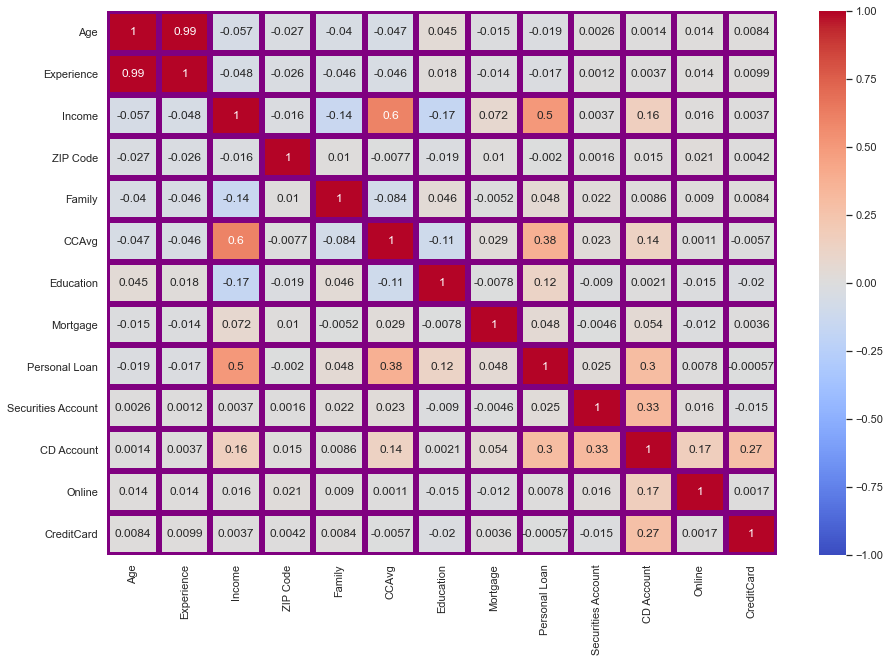

In [232]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (15,10))
#sns.heatmap(df.corr(),annot = True,vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',linewidths=5, linecolor='purple',mask= mask)
sns.heatmap(df.corr(),annot = True,vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',linewidths=5, linecolor='purple')
plt.show()


# EDA (Exploratory Data Analysis)

# ============================================================

# UNIVARIATE ANALYSIS: Categorical Variable {PERSONAL LOAN}

In [233]:
# frequency table: Personal Loan

barchart_PL = df['Personal Loan'].value_counts()
barchart_PL

0    4331
1     407
Name: Personal Loan, dtype: int64

Text(0.5, 1.0, "Pie Chart for the Customer's Personal Loan")

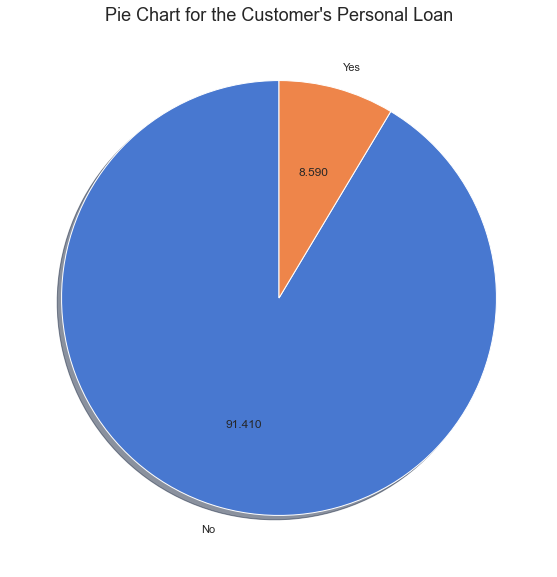

In [234]:
# pie chart 

plt.figure(figsize= (15,10))
plt.pie(barchart_PL,startangle= 90,autopct= '%.3f',
            labels = ['No','Yes'],shadow= True)
plt.title("Pie Chart for the Customer's Personal Loan",fontsize=18)

Text(0, 0.5, '# of people')

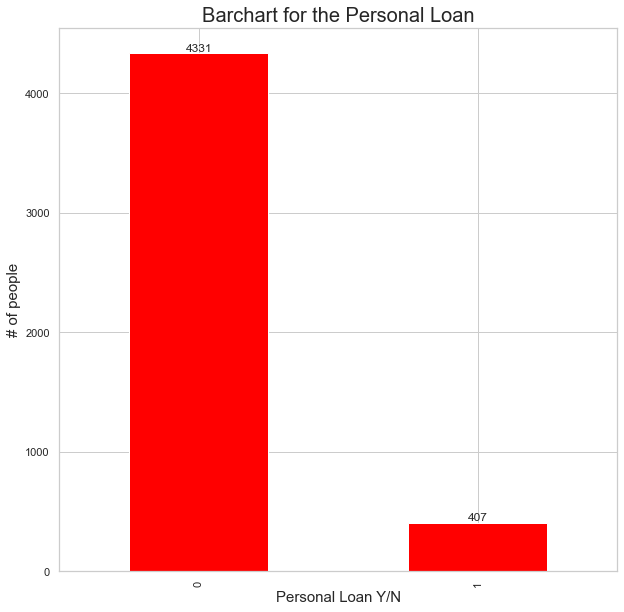

In [235]:
plt.figure(figsize= (10,10))
plt.text(0,barchart_PL[0],'4331',ha = 'center',va = 'bottom')
plt.text(1,barchart_PL[1],'407',ha = 'center',va = 'bottom')
df['Personal Loan'].value_counts().plot.bar(color = 'red')
plt.title("Barchart for the Personal Loan",fontsize=20)
plt.xlabel('Personal Loan Y/N', fontsize=15)
plt.ylabel('# of people', fontsize=15)

# UNIVARIATE ANALYSIS:  Continuous Variable {Income}

In [236]:
#showing first 4 observations of Income column
df.Income.sample(4)

745     49
3496    49
3277    81
938     19
Name: Income, dtype: int64

In [237]:
# five number summary
df.Income.describe()

count    4738.000000
mean       70.010131
std        42.988507
min         8.000000
25%        38.000000
50%        62.000000
75%        91.000000
max       205.000000
Name: Income, dtype: float64

Text(0, 0.5, '# of people')

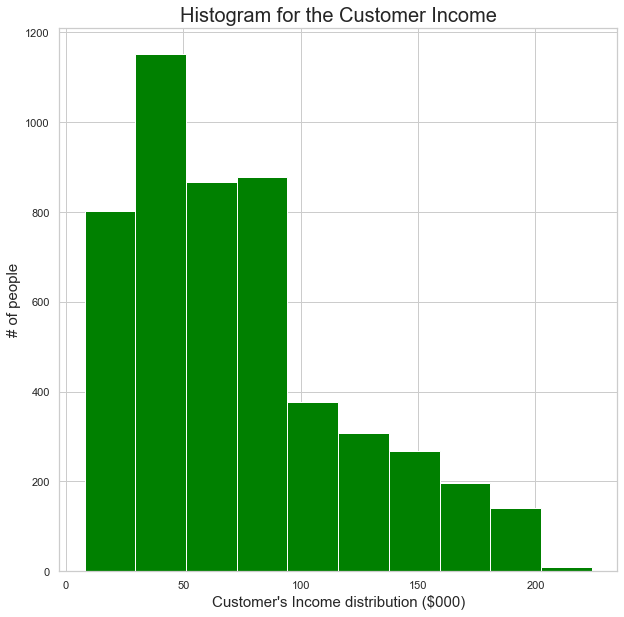

In [238]:
plt.figure(figsize= (10,10))
data['Income'].hist(bins = 10,color = 'green')
plt.title("Histogram for the Customer Income",fontsize=20)
plt.xlabel("Customer's Income distribution ($000)", fontsize=15)
plt.ylabel('# of people', fontsize=15)

<AxesSubplot:title={'center':"Density Plot for the Customer's Income"}, xlabel='Income', ylabel='Density'>

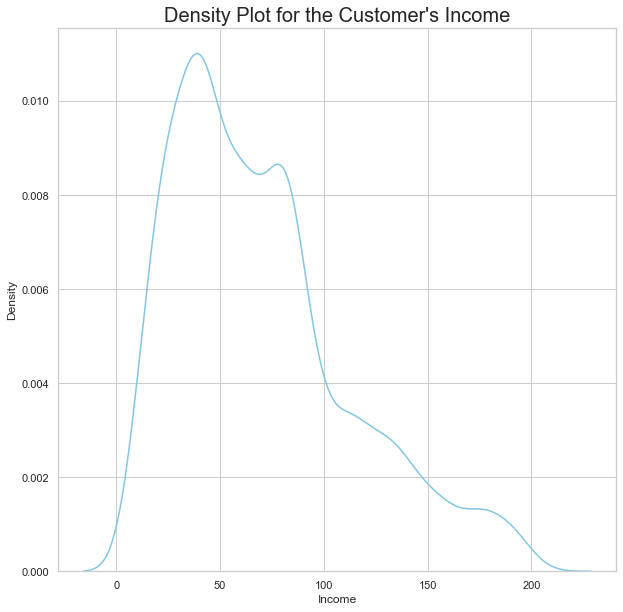

In [239]:
plt.figure(figsize= (10,10))
plt.title("Density Plot for the Customer's Income",fontsize=20)
sns.kdeplot(data=df, x="Income",color="c")

Text(0.5, 1.0, 'Distribution plot for the Customer Income')

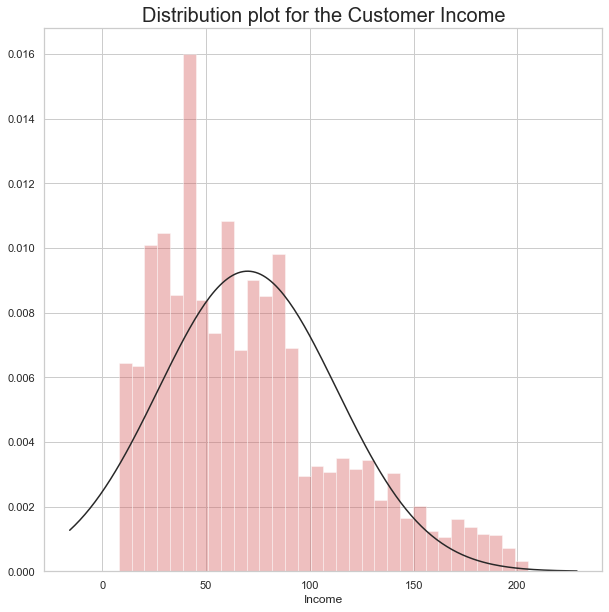

In [41]:
plt.figure(figsize= (10,10))
from scipy.stats import norm
sns.distplot(df.Income, fit=norm, kde=False,color="r")
plt.title("Distribution plot for the Customer Income",fontsize=20)

Text(0.5, 1.0, 'Boxplot  for the Customer Income')

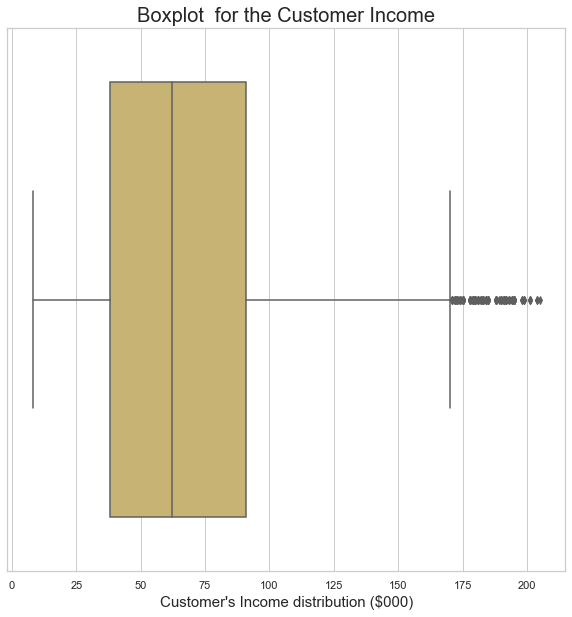

In [42]:
plt.figure(figsize= (10,10))
sns.boxplot(x=df["Income"],color = 'y')
plt.xlabel("Customer's Income distribution ($000)", fontsize=15)
plt.title("Boxplot  for the Customer Income",fontsize=20)

# BI-VARIATE ANALYSIS: Continuous vs Continuous 

Text(0.5, 1.0, 'Association  between CCAvg and Avg. spending on credit cards')

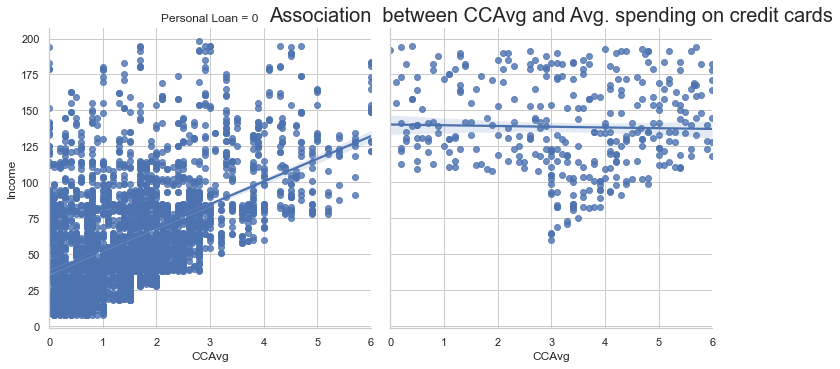

In [180]:
#plt.figure(figsize= (10,10))
sns.lmplot(x="CCAvg", y="Income", col="Personal Loan", data=df)
#plt.title("Association  between CCAvg and Avg. spending on credit cards",fontsize=20)

Text(0.5, 1.0, 'Association between customer Income and Mortgage/ Personal Loan')

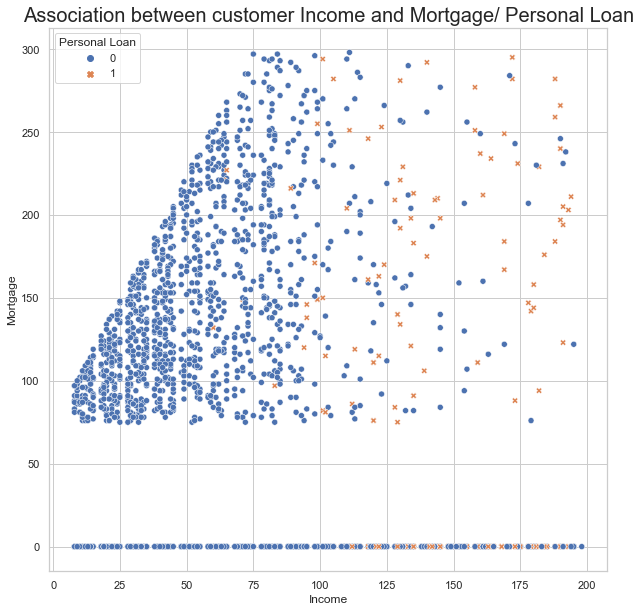

In [183]:
plt.figure(figsize= (10,10))
sns.scatterplot(data=df, y="Mortgage", x="Income", hue="Personal Loan", style="Personal Loan")
plt.title("Association between customer Income and Mortgage/ Personal Loan",fontsize=20)

Text(0.5, 1.0, 'Linear relational plot between Customer Experience and Age')

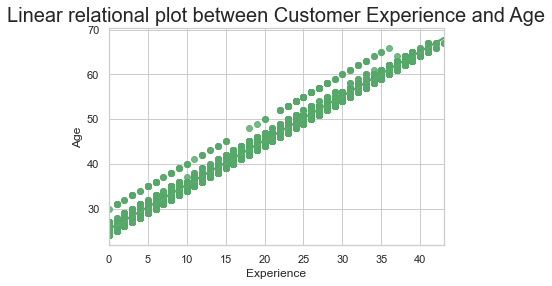

In [178]:
#plt.figure(figsize= (10,10))
sns.regplot(x="Experience", y="Age", data=df,color="g")
plt.title("Linear relational plot between Customer Experience and Age",fontsize=20)

Text(0.5, 1.0, 'Scatter plot between customer CCAvg and Income/ Personal Loan')

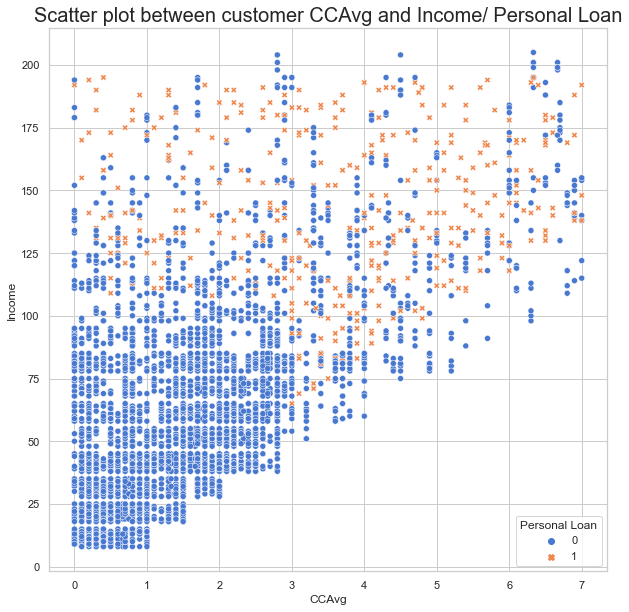

In [45]:
plt.figure(figsize= (10,10))
sns.scatterplot(data=df, x="CCAvg", y="Income", hue="Personal Loan", style="Personal Loan")
plt.title("Scatter plot between customer CCAvg and Income/ Personal Loan",fontsize=20)


# BI-VARIATE ANALYSIS: Continuous vs Categorical 

Text(0.5, 1.0, 'Barchart for the Customer Personal Loan and CCAvg')

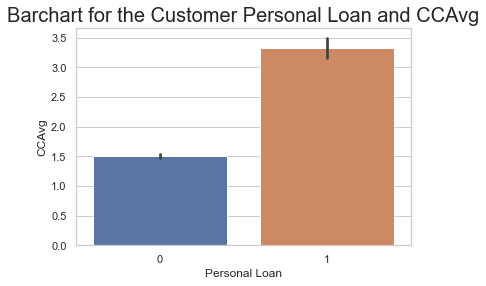

In [184]:
#plt.figure(figsize= (10,10))
sns.barplot(x="Personal Loan", y="CCAvg", data=df)
plt.title("Barchart for the Customer Personal Loan and CCAvg",fontsize=20)

Text(0.5, 1.0, 'Relationship between the family members and Mortgage/Personal Loan')

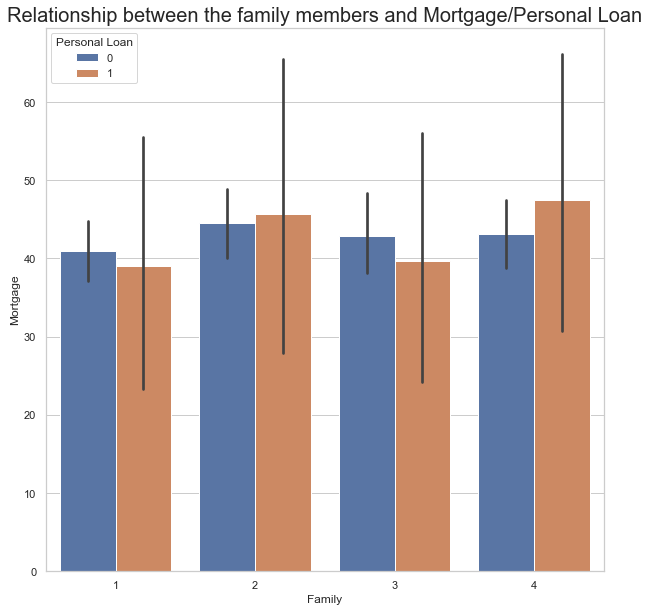

In [186]:
plt.figure(figsize= (10,10))
sns.barplot(x="Family", y="Mortgage", hue="Personal Loan", data=df)
plt.title("Relationship between the family members and Mortgage/Personal Loan",fontsize=20)

Text(0.5, 1.0, 'Relationship between the Credit Card holder and Customer Age/Personal Loan')

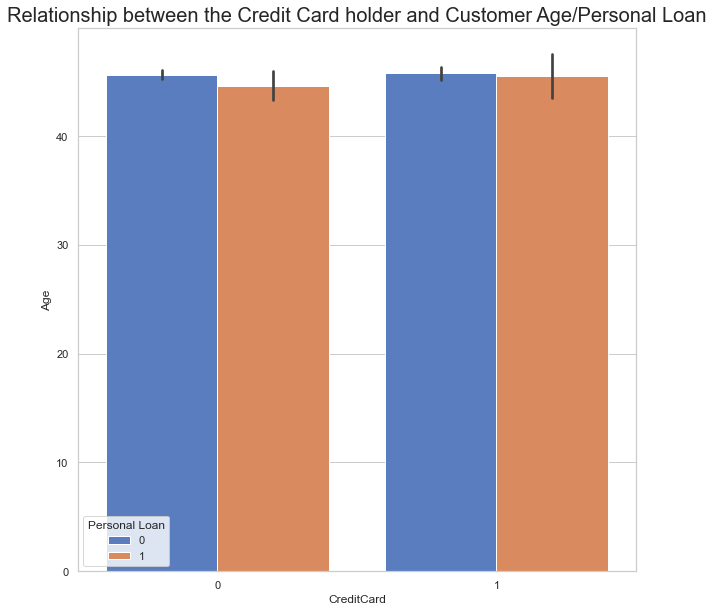

In [48]:
plt.figure(figsize= (10,10))
sns.barplot(x="CreditCard", y="Age", hue="Personal Loan", data=df)
plt.title("Relationship between the Credit Card holder and Customer Age/Personal Loan",fontsize=20)

Text(0.5, 1.0, 'Relationship between the Customer Age and Personal Loan')

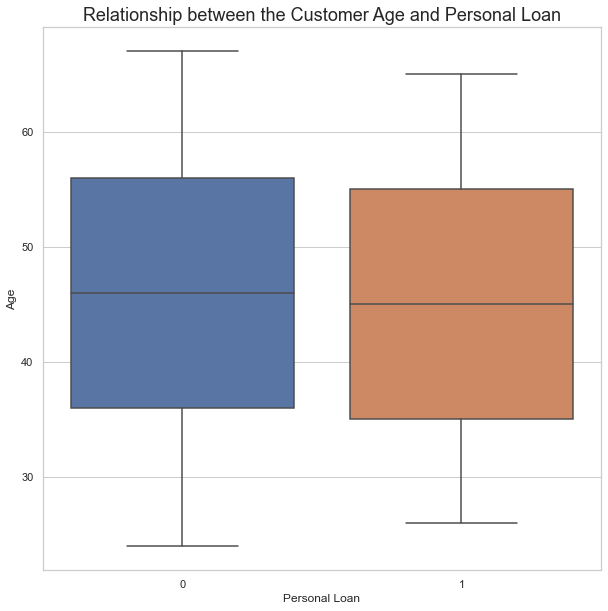

In [187]:
plt.figure(figsize= (10,10))
sns.boxplot(x = 'Personal Loan', y = 'Age', data = df)
plt.title("Relationship between the Customer Age and Personal Loan",fontsize=18)

Text(0.5, 1.0, 'Association between the CCAvg and Income')

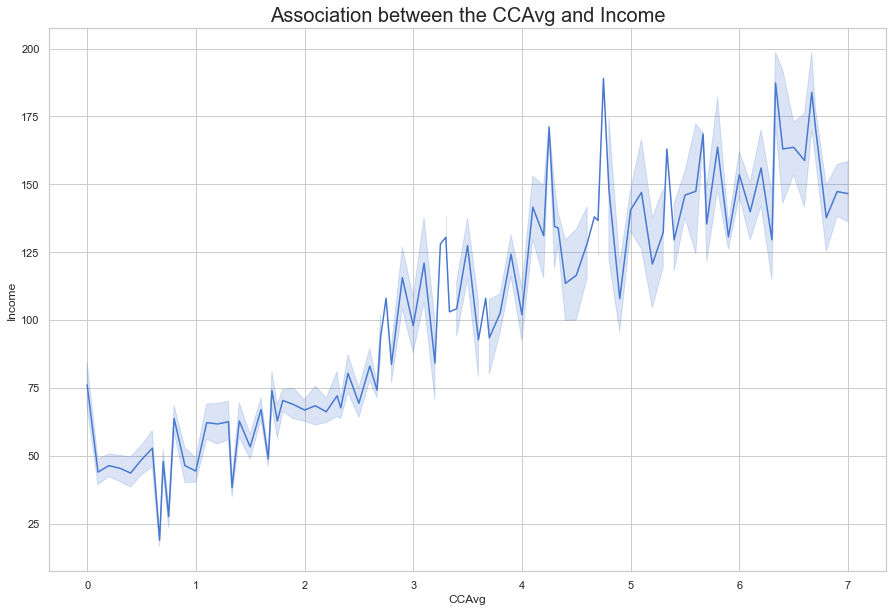

In [50]:
plt.figure(figsize= (15,10))
#sns.lineplot(data=df, x="Family", y="Income")
sns.lineplot(data=df, x="CCAvg", y="Income")
plt.title("Association between the CCAvg and Income",fontsize=20)

# BI-VARIATE ANALYSIS: Categorical vs Categorical 

In [172]:
from scipy.stats import chi2_contingency

In [173]:
#individual percentage of each category
contigency_table = pd.crosstab(df['Personal Loan'],df['Family'],normalize= "index")*100
contigency_table

Family,1,2,3,4
Personal Loan,,,,
0,30.100095,24.094376,20.471878,25.333651
1,25.217391,22.028986,26.086957,26.666667


In [132]:
# frequency table for customer's Personal Loan acceptance rate with respect to their Education level and CD Account

contigency_table = pd.crosstab(df['Personal Loan'],[df['Education'],df["CD Account"]],margins= True)
contigency_table

Education         1         2         3       All
CD Account        0   1     0   1     0   1      
Personal Loan                                    
0              1670  73  1156  32  1223  42  4196
1                42  22    94  42   116  29   345
All            1712  95  1250  74  1339  71  4541

In [133]:
#contigency_table = pd.crosstab(df['Personal Loan'],df['Securities Account']) >> no correlation
#contigency_table = pd.crosstab(df['Personal Loan'],df['CD Account'])
#contigency_table = pd.crosstab(df['Personal Loan'],df['Online']) >> no correlation
contigency_table = pd.crosstab(df['Personal Loan'],df['CreditCard'],margins= True) # >> no correlation
contigency_table

CreditCard,0,1,All
Personal Loan,,,
0,2953,1243,4196
1,247,98,345
All,3200,1341,4541


In [134]:
chi_2, p_val, dof, exp_val = chi2_contingency(contigency_table)

print(chi_2.round(2),'\n',p_val,'\n',dof,'\n',exp_val)

0.23 
 0.9940195224026823 
 4 
 [[2956.88174411 1239.11825589 4196.        ]
 [ 243.11825589  101.88174411  345.        ]
 [3200.         1341.         4541.        ]]


In [135]:
sig_lev = 0.05
if p_val < sig_lev:
    print("There is a correlation between the two variables at significance level {}".format(sig_lev),' or 95% Confidence Interval')
else:
    print("There is no correlation between the two variables")

There is no correlation between the two variables


![](cat_vs_cat.jpg)


# Feature Engineering: Dropping columns

In [240]:
# due to No Correlation
df_new = df.drop(['Securities Account','Online','CreditCard'],axis = 1,inplace= True) 
#due to multi-colinearity
df_new = df.drop(['Experience'],axis = 1,inplace= True)

In [241]:
df.sample(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
2569,35,139,90024,1,4.6,1,0,0,0
1478,65,160,94803,4,3.8,1,237,1,0
1580,39,12,92093,2,0.0,3,0,0,0
890,55,29,92780,4,1.5,3,79,0,0
3376,46,170,95136,2,2.8,1,0,0,0


In [374]:
# creating the dataset before encoding 
df.to_csv("Personal Bank Loan Modeling_edited.csv",index = False)

                                                     HEATMAP 

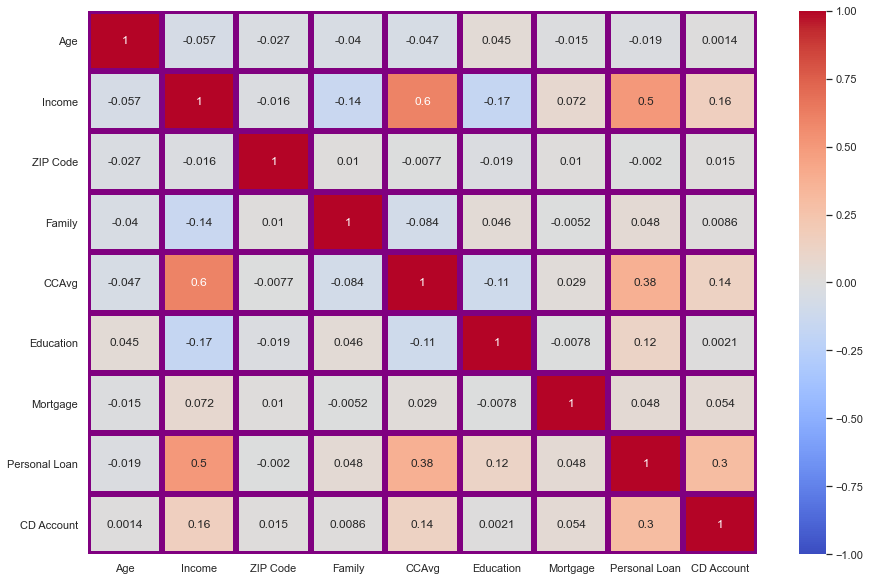

In [243]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True,vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',linewidths=5, linecolor='purple')
plt.show()

In [244]:
df.groupby(['ZIP Code'])['Personal Loan'].count()

ZIP Code
9307     1
90005    5
90007    5
90009    8
90011    3
        ..
96091    4
96094    2
96145    1
96150    4
96651    6
Name: Personal Loan, Length: 464, dtype: int64

In [245]:
df.groupby(['ZIP Code'])['Personal Loan'].mean()

ZIP Code
9307     0.0
90005    0.0
90007    0.0
90009    0.0
90011    0.0
        ... 
96091    0.0
96094    0.0
96145    0.0
96150    0.0
96651    0.0
Name: Personal Loan, Length: 464, dtype: float64

In [246]:
Mean_encoded_zip = df.groupby(['ZIP Code'])['Personal Loan'].mean().to_dict()
df['ZIP Code'] =  df['ZIP Code'].map(Mean_encoded_zip)
df.sample(3)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
1911,60,52,0.111111,3,0.5,2,0,0,0
1437,28,123,0.307692,1,0.8,1,146,0,0
4899,54,85,0.285714,4,1.3,3,299,0,0


# Standardize the dataset

In [247]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [248]:
#traning dataset 

X = df.drop(['Personal Loan',],axis = 1)
X.sample(3)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,CD Account
4070,58,70,0.107595,4,0.7,1,0,0
1452,54,52,0.222222,4,2.5,1,0,0
1182,28,19,0.107595,4,0.4,1,0,0


In [249]:
y = df["Personal Loan"]
y.sample(3)

3066    0
204     0
4681    0
Name: Personal Loan, dtype: int64

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state= 5)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('The shape of X_train: ',X_train.shape,"\n"
      'The shape of X_test: ',X_test.shape, "\n"
      'The shape of y_train: ',y_train.shape, "\n"
      'The shape of y_test: ',y_test.shape)

The shape of X_train:  (3316, 8) 
The shape of X_test:  (1422, 8) 
The shape of y_train:  (3316,) 
The shape of y_test:  (1422,)


# Modeling

# ============================================================

#                                                    Logistic Regression

In [251]:
#Importing libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='saga')
#logistic = LogisticRegression(C=0.01, penalty='l1', solver='saga', tol=0.1)
logistic.fit(X_train, y_train)

LogisticRegression(solver='saga')

In [252]:
#score the model
score = logistic.score(X_test,y_test)
percentage = score * 100
print('The accuracy of the Logistic Regression model is: ',percentage.round(2),"%")

The accuracy of the Logistic Regression model is:  95.92 %


In [253]:
y_pred = logistic.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [254]:
from sklearn.metrics import roc_auc_score
R_A_score = (roc_auc_score(y_test,y_pred)*100).round(3)
print("The ROC and AUC score for Logistic Regression Model is: ",R_A_score, "%")

The ROC and AUC score for Logistic Regression Model is:  82.855 %


In [255]:
y_pred_logistic =logistic.decision_function(X_test)

In [256]:
from sklearn.metrics import roc_curve, auc

logistic_fpr,logistic_tpr,threshold = roc_curve(y_test,y_pred_logistic)
auc_logistic = auc(logistic_fpr,logistic_tpr)

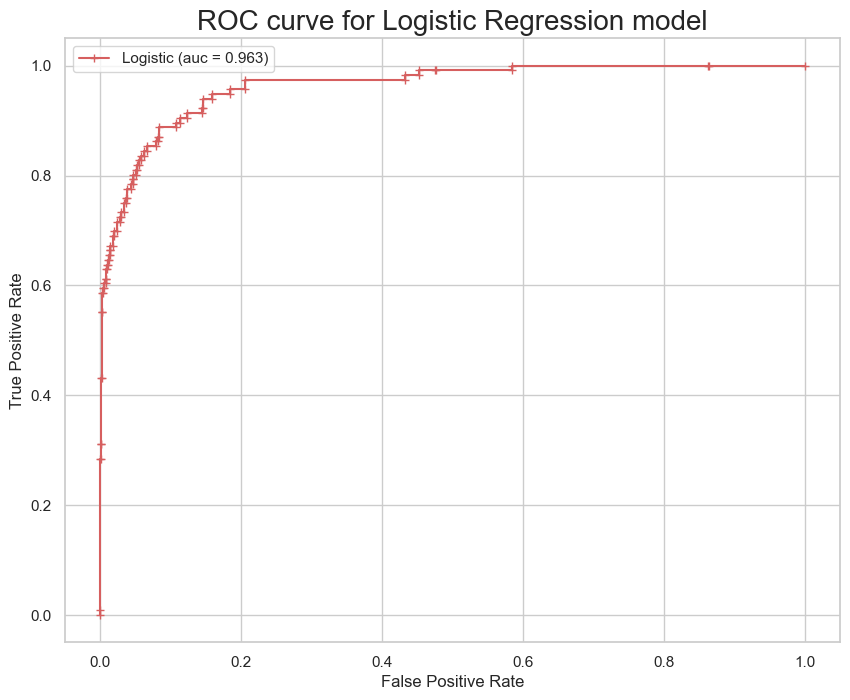

In [261]:
# plotting graph 

plt.figure(figsize=(10,8),dpi=100)
plt.plot(logistic_fpr,logistic_tpr,marker = '+',color = 'r',
         label = 'Logistic (auc = %0.3f)' %auc_logistic)
plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.legend()
plt.title("ROC curve for Logistic Regression model",fontsize=20)
plt.show()

In [268]:
from sklearn.model_selection import cross_val_score
logisticCross = LogisticRegression(solver='saga',max_iter=100)
print(cross_val_score(logisticCross, X, y, cv = 4, scoring= 'accuracy'))

[0.9164557  0.90379747 0.90962838 0.91047297]


In [269]:
print('The accuracy of the LogisticRegression Cross Validation: ',
      cross_val_score(logisticCross,X,y,cv = 5,scoring= 'accuracy').mean().round(2) *100,"%")

The accuracy of the LogisticRegression Cross Validation:  91.0 %


In [270]:
print('The shape of y_test: ',y_test.shape)

The shape of y_test:  (1422,)


In [271]:
logistic_predictions = logistic.predict(X_test)
cm = confusion_matrix(y_test,logistic_predictions)
print('Confusion Matrix: LogisticRegression\n',cm)
print("The diagonal elements are: ",np.diag(cm))
print("Number of correct predictions: ",np.diag(cm).sum())

Confusion Matrix: LogisticRegression
 [[1286   20]
 [  38   78]]
The diagonal elements are:  [1286   78]
Number of correct predictions:  1364


<AxesSubplot:>

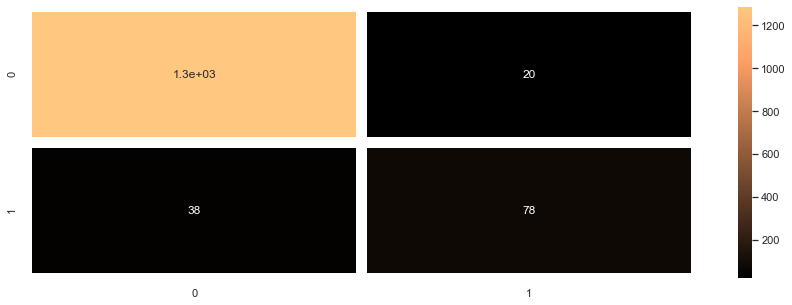

In [272]:
plt.figure(figsize= (15,5))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="copper" ,linewidths=10, linecolor='white')

In [273]:
logistic_predictions = logistic.predict(X_test)
pd.DataFrame(classification_report(y_test,logistic_predictions,output_dict = True)).T

,precision,recall,f1-score,support
0,0.971299,0.984686,0.977947,1306.000000
1,0.795918,0.672414,0.728972,116.000000
accuracy,0.959212,0.959212,0.959212,0.959212
macro avg,0.883609,0.828550,0.853459,1422.000000
weighted avg,0.956992,0.959212,0.957637,1422.000000


#                                             KNN ( K Nearest Neighbour)

In [352]:
from sklearn import datasets, neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=20,leaf_size=15)

In [353]:
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=15, n_neighbors=20)

In [354]:
score = knn.score(X_test,y_test)
print('KNN score: %.2f' % score)
percentage = score * 100
print('The accuracy of the KNN model is: ',percentage.round(2),"%")

KNN score: 0.96
The accuracy of the KNN model is:  96.06 %


In [355]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [356]:
R_A_score = (roc_auc_score(y_test,y_pred)*100).round(3)
print("The ROC and AUC score for K Nearest Neighbour Model is: ",R_A_score, "%")

The ROC and AUC score for K Nearest Neighbour Model is:  76.648 %


In [357]:
from sklearn.model_selection import cross_val_score
knnCross = neighbors.KNeighborsClassifier(n_neighbors=20,leaf_size=20, p=1)
print(cross_val_score(knnCross, X, y, cv = 5, scoring= 'accuracy'))

[0.9314346  0.93670886 0.92932489 0.92608237 0.91974657]


In [358]:
print('The accuracy of the LogisticRegression Cross Validation: ',
      cross_val_score(knnCross,X,y,cv = 5,scoring= 'accuracy').mean().round(3) *100,"%")

The accuracy of the LogisticRegression Cross Validation:  92.9 %


In [342]:
#for no.of neighbors from 1 - 5, graph the k-fold scores
scores = []
for i in range(1,6,1):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(knn,X,y,cv=5).mean())

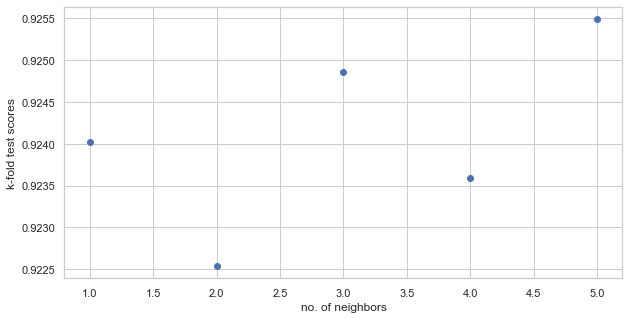

In [344]:
plt.figure(figsize= (10,5))
sns.set_theme(style="whitegrid")
plt.scatter(range(1,6,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()

In [359]:
knn_predictions = knn.predict(X_test)

In [360]:
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test,knn_predictions)
print('Confusion Matrix: KNN\n',cm)
print("The diagonal elements are: ",np.diag(cm))
print("Number of correct predictions: ",np.diag(cm).sum())

Confusion Matrix: KNN
 [[1304    2]
 [  54   62]]
The diagonal elements are:  [1304   62]
Number of correct predictions:  1366


<AxesSubplot:>

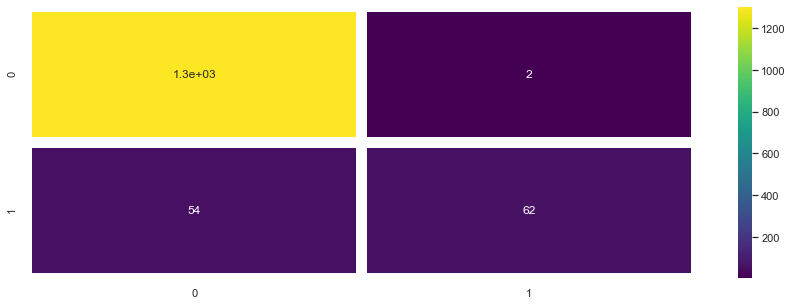

In [363]:
plt.figure(figsize= (15,5))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="viridis" ,linewidths=10, linecolor='white')

In [361]:
pd.DataFrame(classification_report(y_test,knn_predictions,output_dict = True)).T

,precision,recall,f1-score,support
0,0.960236,0.998469,0.978979,1306.000000
1,0.968750,0.534483,0.688889,116.000000
accuracy,0.960619,0.960619,0.960619,0.960619
macro avg,0.964493,0.766476,0.833934,1422.000000
weighted avg,0.960930,0.960619,0.955315,1422.000000


# Random Forest 

In [365]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
r_Forest=RandomForestClassifier(n_estimators=100,random_state = 200,bootstrap = False,min_impurity_decrease = 0.0001)              #Create a Gaussian Classifier
r_Forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, min_impurity_decrease=0.0001,
                       random_state=200)

In [366]:
score = r_Forest.score(X_test,y_test)
print('RForest score: %.2f' % score)
percentage = score * 100
print('The accuracy of the Random Forest model is: ',percentage.round(2),"%")

RForest score: 0.99
The accuracy of the Random Forest model is:  98.87 %


In [367]:
y_pred = r_Forest.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [368]:
R_A_score = (roc_auc_score(y_test,y_pred)*100).round(3)
print("The ROC and AUC score for Random Forest Model is: ",R_A_score, "%")

The ROC and AUC score for Random Forest Model is:  93.889 %


In [369]:
RForest_Cross = RandomForestClassifier(n_estimators=100,criterion='entropy',bootstrap = False)
print(cross_val_score(RForest_Cross, X, y, cv = 5, scoring= 'accuracy'))

[0.98945148 0.98945148 0.98417722 0.99260824 0.98627244]


In [370]:
print('The accuracy of the Random Forest Cross Validation: ',
      cross_val_score(RForest_Cross,X,y,cv = 5,scoring= 'accuracy').mean().round(3) *100,"%")

The accuracy of the Random Forest Cross Validation:  98.9 %


In [371]:
RForest_predictions = r_Forest.predict(X_test)
cm = confusion_matrix(y_test,RForest_predictions)
print('Confusion Matrix: Random Forest\n',cm)
print("The diagonal elements are: ",np.diag(cm))
print("Number of correct predictions: ",np.diag(cm).sum())

Confusion Matrix: Random Forest
 [[1304    2]
 [  14  102]]
The diagonal elements are:  [1304  102]
Number of correct predictions:  1406


<AxesSubplot:>

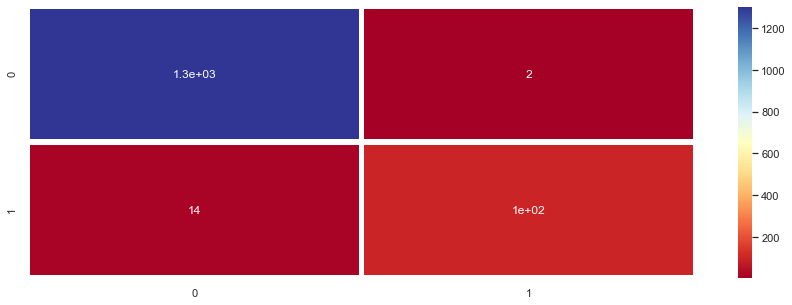

In [373]:
plt.figure(figsize= (15,5))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdYlBu" ,linewidths=5, linecolor='white')

In [295]:
pd.DataFrame(classification_report(y_test,RForest_predictions,output_dict = True)).T

,precision,recall,f1-score,support
0,0.989378,0.998469,0.993902,1306.000000
1,0.980769,0.879310,0.927273,116.000000
accuracy,0.988748,0.988748,0.988748,0.988748
macro avg,0.985074,0.938889,0.960588,1422.000000
weighted avg,0.988676,0.988748,0.988467,1422.000000


# ADABoost : Adaptive Boosting

In [296]:
#importing libraries

from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [297]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate= 0.01,random_state = 123)
ADAbt = abc.fit(X_train, y_train)

In [298]:
#checking the ADABoost classifier model score

score = ADAbt.score(X_test,y_test)
print('ADABoost classifier score: %.2f' % score)
percentage = score * 100
print('The accuracy of the ADABoost model is: ',percentage.round(2),"%")

ADABoost classifier score: 0.92
The accuracy of the ADABoost model is:  91.84 %


In [300]:
y_pred = ADAbt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [301]:
R_A_score = (roc_auc_score(y_test,y_pred)*100).round(3)
print("The ROC and AUC score for Adaptive Boosting Model is: ",R_A_score, "%")

The ROC and AUC score for Adaptive Boosting Model is:  50.0 %


In [302]:
ADAbt_CV = abc
print(cross_val_score(ADAbt_CV, X, y, cv = 5, scoring= 'accuracy'))

[0.91455696 0.91350211 0.91350211 0.91446674 0.91446674]


In [303]:
print('The accuracy of the ADABoost Cross Validation: ',
      cross_val_score(ADAbt_CV,X,y,cv = 5,scoring= 'accuracy').mean().round(2)*100,"%")

The accuracy of the ADABoost Cross Validation:  91.0 %


In [305]:
ADABt_predictions = abc.predict(X_test)
cm = confusion_matrix(y_test,ADABt_predictions)
print('Confusion Matrix: ADABoost\n',cm)
print("The diagonal elements are: ",np.diag(cm))
print("Number of correct prediction: ",np.diag(cm).sum())

Confusion Matrix: ADABoost
 [[1306    0]
 [ 116    0]]
The diagonal elements are:  [1306    0]
Number of correct prediction:  1306


<AxesSubplot:>

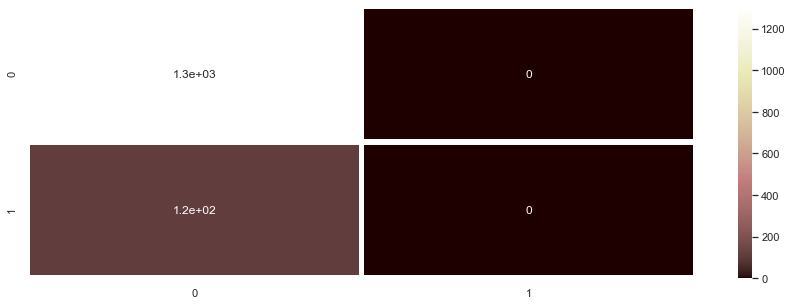

In [306]:
plt.figure(figsize= (15,5))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="pink" ,linewidths=5, linecolor='white')

In [307]:
pd.DataFrame(classification_report(y_test,ADABt_predictions,output_dict = True)).T

,precision,recall,f1-score,support
0,0.918425,1.000000,0.957478,1306.000000
1,0.000000,0.000000,0.000000,116.000000
accuracy,0.918425,0.918425,0.918425,0.918425
macro avg,0.459212,0.500000,0.478739,1422.000000
weighted avg,0.843504,0.918425,0.879372,1422.000000


# SVM (Support Vector Machine)

In [308]:
#importing libraries for SVM

from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', degree=3,tol=0.01,random_state = 54321)
svclassifier.fit(X_train, y_train)

SVC(random_state=54321, tol=0.01)

In [309]:
#checking the SVM model score

score = svclassifier.score(X_test,y_test)
print('SVM model score: %.2f' % score)
percentage = score * 100
print('The accuracy of the SVM model is: ',percentage.round(2),"%")

SVM model score: 0.98
The accuracy of the SVM model is:  97.96 %


In [310]:
y_pred = svclassifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [311]:
R_A_score = (roc_auc_score(y_test,y_pred)*100).round(3)
print("The ROC and AUC score for SVM Model is: ",R_A_score, "%")

The ROC and AUC score for SVM Model is:  88.285 %


In [312]:
y_pred_svc =svclassifier.decision_function(X_test)

In [313]:
from sklearn.metrics import roc_curve, auc
svc_fpr, svc_tpr,threshold = roc_curve(y_test,y_pred_svc)
auc_svc = auc(svc_fpr,svc_tpr)

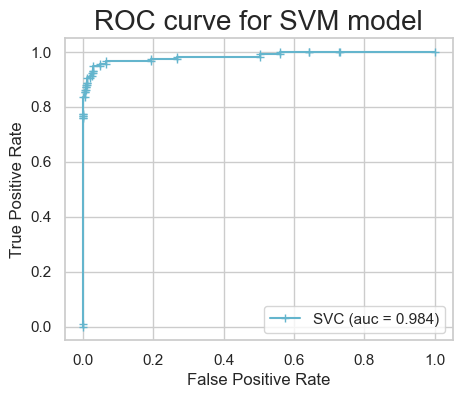

In [317]:
# plotting graph 

#plt.figure(figsize=(10,6),dpi=100)
plt.figure(figsize=(5,4),dpi=100)
plt.plot(svc_fpr, svc_tpr,marker = '+',color = 'c',
         label = 'SVC (auc = %0.3f)' % auc_svc)
plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.legend()
plt.title("ROC curve for SVM model",fontsize=20)
plt.show()

In [319]:
SVM_CV = svclassifier
print(cross_val_score(SVM_CV, X, y, cv = 5, scoring= 'accuracy'))

[0.92299578 0.92194093 0.91244726 0.91974657 0.91024287]


In [320]:
print('The accuracy of the SVM Cross Validation: ',
      cross_val_score(SVM_CV,X,y,cv = 10,scoring= 'accuracy').mean().round(2)*100,"%")

The accuracy of the SVM Cross Validation:  92.0 %


In [321]:
SVM_predictions = svclassifier.predict(X_test)
cm = confusion_matrix(y_test,SVM_predictions)
print('Confusion Matrix: SVM\n',cm)
print("The diagonal elements are: ",np.diag(cm))
print("Number of correct predictions: ",np.diag(cm).sum())

Confusion Matrix: SVM
 [[1304    2]
 [  27   89]]
The diagonal elements are:  [1304   89]
Number of correct predictions:  1393


<AxesSubplot:>

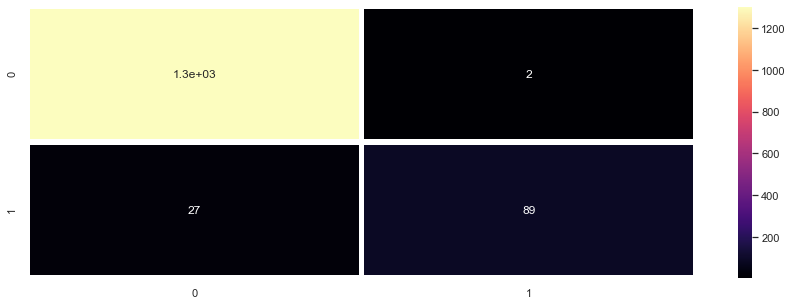

In [322]:
plt.figure(figsize= (15,5))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="magma" ,linewidths=5, linecolor='white')

In [323]:
pd.DataFrame(classification_report(y_test,SVM_predictions,output_dict = True)).T

,precision,recall,f1-score,support
0,0.979715,0.998469,0.989003,1306.000000
1,0.978022,0.767241,0.859903,116.000000
accuracy,0.979606,0.979606,0.979606,0.979606
macro avg,0.978868,0.882855,0.924453,1422.000000
weighted avg,0.979576,0.979606,0.978471,1422.000000


# Naive Bayes

In [324]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [325]:
score = NB.score(X_test,y_test)
print('Naive Bayes model score: %.2f' % score)
percentage = score * 100
print('The accuracy of the Naive Bayes model is: ',percentage.round(2),"%")

Naive Bayes model score: 0.90
The accuracy of the Naive Bayes model is:  90.3 %


In [326]:
y_pred = NB.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [327]:
R_A_score = (roc_auc_score(y_test,y_pred)*100).round(3)
print("The ROC and AUC score for SVM Model is: ",R_A_score, "%")

The ROC and AUC score for SVM Model is:  75.865 %


In [329]:
NB_CV = NB
print(cross_val_score(NB_CV, X, y, cv = 5, scoring= 'accuracy'))

[0.91244726 0.91877637 0.91877637 0.91024287 0.89968321]


In [330]:
print('The accuracy of the Naive Bayes Cross Validation: ',
      cross_val_score(NB_CV,X,y,cv = 10,scoring= 'accuracy').mean().round(2)*100,"%")

The accuracy of the Naive Bayes Cross Validation:  91.0 %


In [331]:
NB_predictions = NB.predict(X_test)
cm = confusion_matrix(y_test,NB_predictions)
print('Confusion Matrix: Naive Bayes\n',cm)
print("The diagonal elements are: ",np.diag(cm))
print("Number of correct predictions: ",np.diag(cm).sum())

Confusion Matrix: Naive Bayes
 [[1216   90]
 [  48   68]]
The diagonal elements are:  [1216   68]
Number of correct predictions:  1284


<AxesSubplot:>

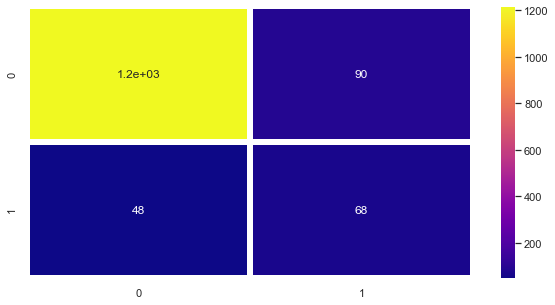

In [332]:
plt.figure(figsize= (10,5))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="plasma" ,linewidths=5, linecolor='white')

In [333]:
pd.DataFrame(classification_report(y_test,NB_predictions,output_dict = True)).T

,precision,recall,f1-score,support
0,0.962025,0.931087,0.946304,1306.000000
1,0.430380,0.586207,0.496350,116.000000
accuracy,0.902954,0.902954,0.902954,0.902954
macro avg,0.696203,0.758647,0.721327,1422.000000
weighted avg,0.918656,0.902954,0.909598,1422.000000
